In [1]:
from sklearn import datasets                                           # Importing datasets from sklearn
import numpy as np                                                     # Importing numpy 
import math                                                            # Importing math
import pandas as pd                                                    # Importing pandas 
np.seterr(divide='ignore',invalid='ignore')                            # To supress division warning

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
'''
For actual implementation of decision tree as per project's part two

'''
class bt:                                                               # Binary tree class
    def __init__(self,entropy,level,split_feature,gain,cls_name):
        self.split_feature = split_feature 
        self.entropy = entropy
        self.gain = gain
        self.level = level
        self.right = None
        self.left = None
        self.cls_name=cls_name



def printbt1(root,s):                                                   # Function to print the tree
    if root is None:
         return
    print(s)
    print("Level :- " ,root.level)
    print("Entropy :- " ,root.entropy)
    print("Split_Feature :- ",root.split_feature)
    print("Gain :- ",root.gain)
    print("Class name :-",root.cls_name)
    print()
    
    printbt1(root.left,"Left Node")
    printbt1(root.right,"Right Node")

In [3]:
def countSetosa(output):                                               # Function to get count of Setosa
    output=np.array(output[:])
    return (output==0).sum()    

def countVersicolor(output):                                           # Function to get count of Versicolor
    output=np.array(output[:])
    return (output==1).sum()


In [4]:
def entropy(output):
    total=len(output)                                                  # Total number of flowers currently
    no_of_setosa=countSetosa(output)                                   # Count the number of setosa out of total
    no_of_versicolor=countVersicolor(output)                           # Count the number of versicolor out of total
    no_of_virginica=total-no_of_setosa-no_of_versicolor                # Count the number of virginica out of total
     
    p1=no_of_setosa/total                                              # Calculate p1
    p2=no_of_versicolor/total                                          # Calculate p2
    p3=no_of_virginica/total                                           # Calculate p3 
    
    return_value=0                                                     # Initialise return_value to be zero
    if p1!=0:
        return_value+=p1*math.log(p1,2)                                # Use formula of entropy to calculate entropy for 
    if p2!=0:                                                          #  each class and keep adding them to return_value 
        return_value+=p2*math.log(p2,2)
    if p3!=0:
        return_value+=p3*math.log(p3,2)
    if not return_value:                                               # If total entropy is zero, just return it
        return return_value
    return_value=-return_value                                         # Need to change the sign as per the formula
    return return_value

In [5]:
def splitGain(split1,split2,output):                                   # Function to get the split gain
    p1=len(split1)/len(output)                                         # Calculate p1
    p2=len(split2)/len(output)                                         # Calculate p2
    return_value=0                                                     # Initialise return_value as 0
    if p1!=0:
        return_value+=p1*math.log(p1,2)
    if p2!=0:
        return_value+=p2*math.log(p2,2)
    return -return_value                                               # Change the sign as per the formula

In [6]:
def gainRatio(f,i,data_node,output,features):                          # Function to obtain gain ratio
    no_of_features_left=len(features)
    total_elements=len(data_node)
    no_of_setosa=countSetosa(data_node)                                # Count the number of setosa
    no_of_versicolor=countVersicolor(data_node)                        # Count the number of versicolor
    no_of_virginica=total_elements-no_of_setosa-no_of_versicolor       # Count the number of virginica
    initial_entropy=entropy(output)                                    # Get initial entropy
    split1_data=data_node[data_node[f]>i]                              # x of split1
    split2_data=data_node[data_node[f]<=i]                             # x of split2
    split1_output=output[data_node[f]>i]                               # y of split1
    split2_output=output[data_node[f]<=i]                              # y of split1   
    final_entropy=0                                                    # Initialise final entropy
    final_entropy+=entropy(split1_output)*len(split1_output)/len(output)    # Add entropy of split1 to final entropy
    final_entropy+=entropy(split2_output)*len(split2_output)/len(output)    # Add entropy of split2 to final entropy
    entropy_gain=initial_entropy-final_entropy                         # Calculate entropy gain
    split_gain=splitGain(split1_output,split2_output,output)           # Calculate split gain
    return entropy_gain/(split_gain)                    
    

In [7]:
def splitOn(f,data_node,output,features):                              # Function to decide feature to split upon
    lst=list((data_node[f]))
    temp_max=-1                                                        # Initialise temp_max
    imp=-1                                                             # Initialise variable imp which stores on which numeric value of a feature we have to split
    for i in range(len(lst)-1):                                        # Access elements of lst    
        s=lst[i]     
        e=lst[i+1]
        mid=(s+e)/2                                                    # Find mid of pairs (s,e)                                                  
        temp=gainRatio(f,mid,data_node,output,features)                # Get gain ratio for this particular split into temp
        if temp>temp_max:                                              # If temp is more than temp_max, update temp_max and imp
            temp_max=temp
            imp=mid
    
    return temp_max,imp

In [8]:
def FeatureSplitting(data_node,features,output):                       # Function to do splitting on features
    max_gain_ratio=0                                                   # Initilialise the gain ratio
    feature_to_split_upon=None
    total_elements=len(data_node)
    for f in features:                                                 # Consider each feature
        temp,temp2=splitOn(f,data_node,output,features)                # Get gain ratio and numeric value of feature to split upon
        if temp>max_gain_ratio:                                        # Update max_gain_ratio, feature_to_split_upon and imp if condition is true
            max_gain_ratio=temp
            feature_to_split_upon=f
            imp=temp2
    return feature_to_split_upon,max_gain_ratio,imp

In [9]:
def showDecisionTree(data_node,output,features,level):              # Function to show decision tree
    no_of_features_left=len(features)
    total_elements=len(data_node)
    no_of_setosa=countSetosa(output)                                # Count the number of setosa
    no_of_versicolor=countVersicolor(output)                        # Count the number of versicolor
    no_of_virginica=total_elements-no_of_setosa-no_of_versicolor    # Count the number of virginica
    print('Level',level)                                  
    print('Count of setosa = ',no_of_setosa)
    print('Count of versicolor = ',no_of_versicolor)
    print('Count of virginica =',no_of_virginica)
    print('Current Entropy is =',entropy(output))                   # Calculate and print current entropy
    maximum=max(no_of_setosa,no_of_versicolor,no_of_virginica)
    if maximum==no_of_setosa:
        cls_name='Setosa'
    elif maximum==no_of_versicolor:
        cls_name='Versicolor'
    else :
        cls_name='Virginica'
    if no_of_setosa==total_elements or no_of_versicolor==total_elements or no_of_virginica==total_elements or no_of_features_left==0:
        root = bt(entropy(output),level,"Can't split, reached leaf node",0,cls_name)
        print('Reached leaf node')  
        print()
        return root
    else:
        feature_to_split_upon,max_gain_ratio,imp=FeatureSplitting(data_node,features,output)
        print('Splitting on feature',feature_to_split_upon,'with gain ratio',max_gain_ratio)
        root = bt(entropy(output),level,feature_to_split_upon,max_gain_ratio,cls_name)
        print()
        data_node1=data_node[data_node[feature_to_split_upon]>imp]   # x part of splitted data(first split)
        data_node2=data_node[data_node[feature_to_split_upon]<=imp]  # x part of splitted data(second split)
        output1=output[data_node[feature_to_split_upon]>imp]         # y part of splitted data(first split)
        output2=output[data_node[feature_to_split_upon]<=imp]        # y part of splitted data(second split)
        root.left=showDecisionTree(data_node1,output1,features,level+1)        # Print next level for first split, add left child to root
        root.right=showDecisionTree(data_node2,output2,features,level+1)       # Print next level for second split, add left child to root 
        return root

In [10]:
iris=datasets.load_iris()                                            # Load iris dataset
print(iris)                                                          # Just to check dataset

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [11]:
iris_data=pd.DataFrame(iris.data)                                                   # Make dataframe
iris_output=pd.DataFrame(iris.target)
iris_data.head()
iris_data.columns=iris.feature_names                                                # Update column values 
root=showDecisionTree(iris_data,iris_output,iris_data.columns,0)                    # Call function to show decision tree

Level 0
Count of setosa =  50
Count of versicolor =  50
Count of virginica = 50
Current Entropy is = 1.584962500721156
Splitting on feature petal width (cm) with gain ratio 0.9999999999999999

Level 1
Count of setosa =  0
Count of versicolor =  50
Count of virginica = 50
Current Entropy is = 1.0
Splitting on feature petal width (cm) with gain ratio 0.6933647985912662

Level 2
Count of setosa =  0
Count of versicolor =  1
Count of virginica = 45
Current Entropy is = 0.15109697051711368
Splitting on feature petal length (cm) with gain ratio 0.2622302372762406

Level 3
Count of setosa =  0
Count of versicolor =  0
Count of virginica = 43
Current Entropy is = 0.0
Reached leaf node

Level 3
Count of setosa =  0
Count of versicolor =  1
Count of virginica = 2
Current Entropy is = 0.9182958340544896
Splitting on feature sepal width (cm) with gain ratio 1.0

Level 4
Count of setosa =  0
Count of versicolor =  1
Count of virginica = 0
Current Entropy is = 0.0
Reached leaf node

Level 4
Count of

# Actual implementation of decision tree in the form of a tree (Project part-2)

In [12]:
printbt1(root,'Root Node')

Root Node
Level :-  0
Entropy :-  1.584962500721156
Split_Feature :-  petal width (cm)
Gain :-  0.9999999999999999
Class name :- Setosa

Left Node
Level :-  1
Entropy :-  1.0
Split_Feature :-  petal width (cm)
Gain :-  0.6933647985912662
Class name :- Versicolor

Left Node
Level :-  2
Entropy :-  0.15109697051711368
Split_Feature :-  petal length (cm)
Gain :-  0.2622302372762406
Class name :- Virginica

Left Node
Level :-  3
Entropy :-  0.0
Split_Feature :-  Can't split, reached leaf node
Gain :-  0
Class name :- Virginica

Right Node
Level :-  3
Entropy :-  0.9182958340544896
Split_Feature :-  sepal width (cm)
Gain :-  1.0
Class name :- Virginica

Left Node
Level :-  4
Entropy :-  0.0
Split_Feature :-  Can't split, reached leaf node
Gain :-  0
Class name :- Versicolor

Right Node
Level :-  4
Entropy :-  0.0
Split_Feature :-  Can't split, reached leaf node
Gain :-  0
Class name :- Virginica

Right Node
Level :-  2
Entropy :-  0.44506485705083865
Split_Feature :-  petal length (cm)
Gain

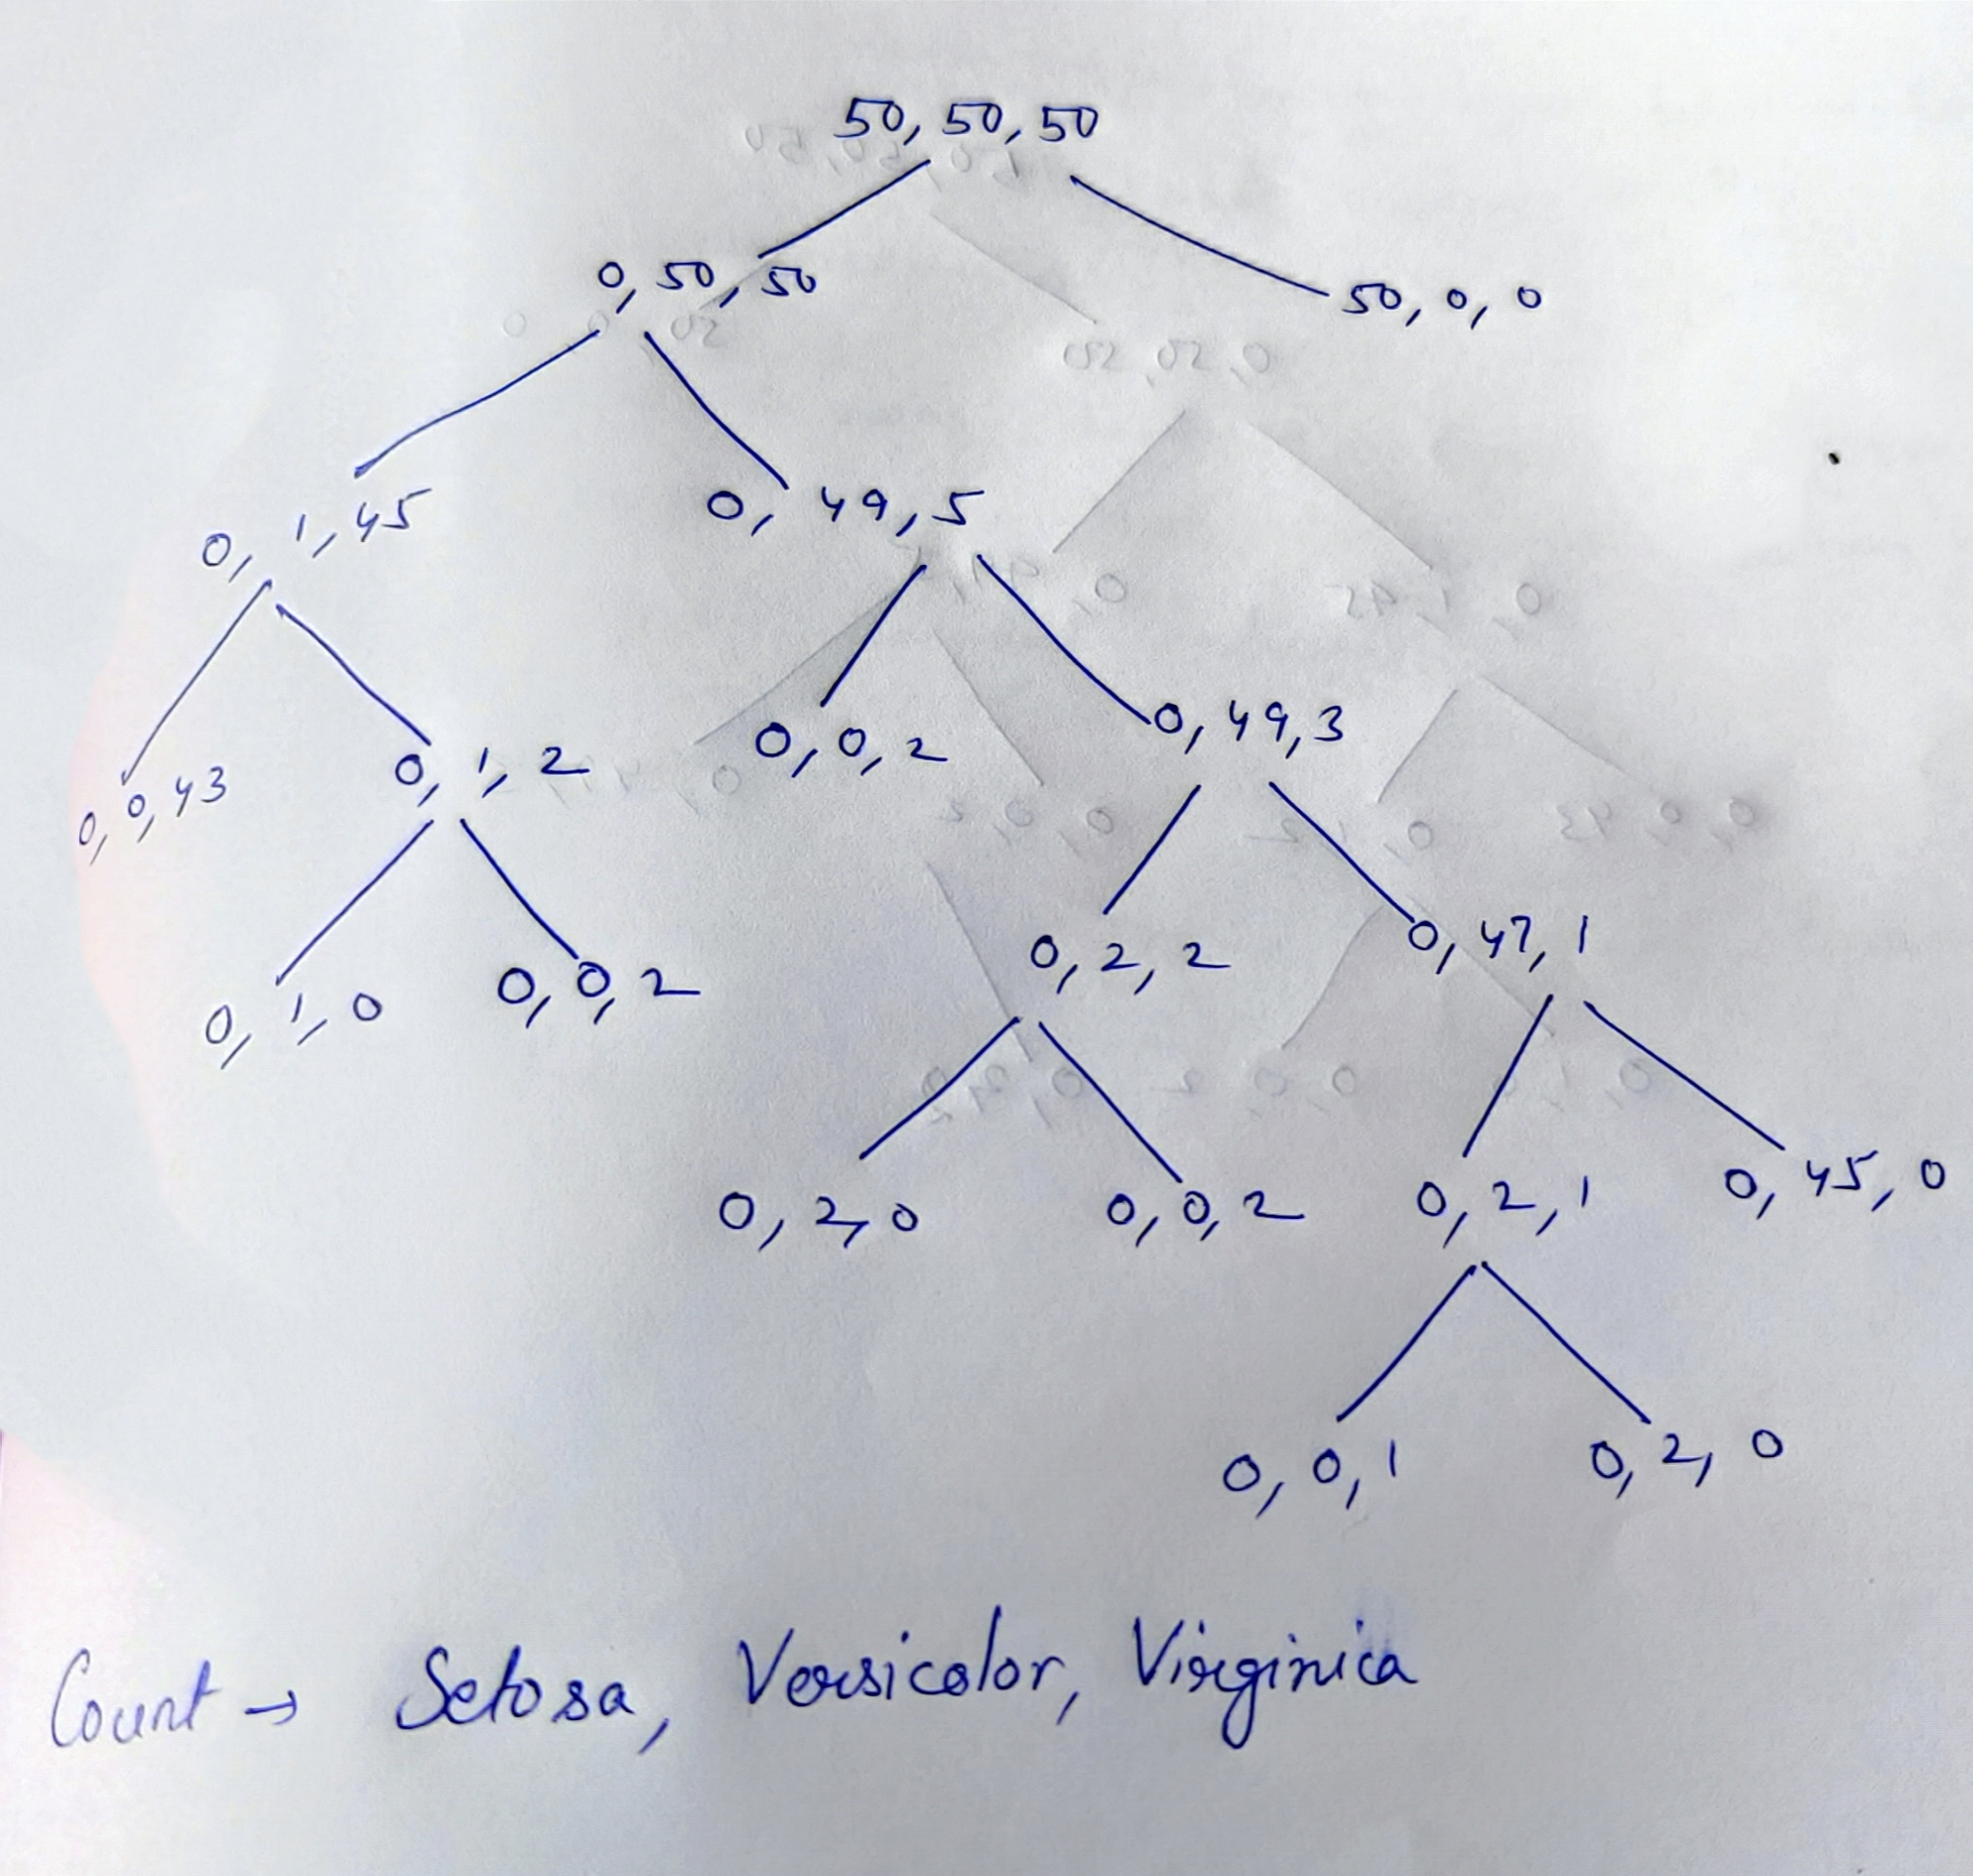